<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#implement-recommendation-system-using-sushi-datasets" data-toc-modified-id="implement-recommendation-system-using-sushi-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>implement recommendation system using sushi datasets</a></span><ul class="toc-item"><li><span><a href="#方針" data-toc-modified-id="方針-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>方針</a></span></li></ul></li></ul></div>

## implement recommendation system using sushi datasets
https://ohke.hateblo.jp/entry/2017/09/22/230000 の写経
datasetsをもとに、ユーザーのインデックスを渡すと、類似したユーザーの選んだ寿司ネタをもとにおすすめの寿司ネタを返すユーザーベース強調フィルタリングのレコメンドエンジンを実装する.

get sushi_datasets here!

http://www.kamishima.net/sushi/

import libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
datasets = np.loadtxt("./sushi3-2016/sushi3b.5000.10.score",delimiter = ' ')

In [5]:
sushi_df = pd.DataFrame(datasets)

inspect datasets

In [6]:
sushi_df.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.0,0.0,-1.0,4.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,3.0,4.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,4.0,-1.0,-1.0,3.0,4.0,1.0,-1.0,-1.0,4.0,3.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,4.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [7]:
sushi_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.299600,0.241600,0.21900,0.141200,-0.017400,0.076200,0.113600,0.032200,0.17140,0.065600,...,-0.961600,-0.948000,-0.955800,-0.957800,-0.959800,-0.931200,-0.950600,-0.966400,-0.952800,-0.953800
std,2.022636,1.983234,2.01828,1.889438,1.798261,1.786122,1.915993,1.795608,2.02367,1.924588,...,0.347778,0.446022,0.380362,0.368845,0.359736,0.509233,0.432894,0.304121,0.403738,0.409022
min,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,2.000000,2.000000,2.00000,2.000000,0.000000,2.000000,1.000000,1.000000,1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


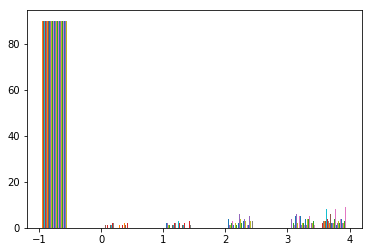

In [13]:
plt.hist(sushi_df.sample(n=100))
plt.show()

ランダムに抽出したユーザーの評価を見るとほとんどが欠損値.

datasetsからランダムに100人を抽出して好みの分布を調べるとほとんどが-1, つまり評価していない欠損値になっている.
評価が共通している、かつ評価が高いものを探したいのでこの-1はあまり重要ではない.

### 方針
配列aと配列bに関して、すべてのindexに対して、indexに対応する値が 1.どちらか一方の配列で欠損値、または2.両方の配列でともに欠損値のものを除く要素数をカウントし、それが一定以上のもの(default: 3)を抽出する.



In [9]:
# 指定した人と類似した人のindexと類似度を類似度降順で返す.
def find_people_similar_to(person_idx,df,mimimum_similarity=0):
    scores = df.values
    score_of_target_person = scores[person_idx]
    similarities=[]
    for idx, score in enumerate(scores):
        indices = np.where((score_of_target_person+1)*(score+1)!= 0)[0]
        # indices = "少なくとも片方の配列で欠損値があるインデックスを除外したインデックス"
        
        if len(indices) < 3 or idx == person_idx:
            # 指定したユーザーとあるユーザーが共通で評価している要素が少ない場合、除外する
            # 指定したユーザーのスコアを無視する
            continue
            
        similarity = np.corrcoef(score_of_target_person[indices],score[indices])[0,1]
        # 配列のindices番目をつかって相関係数をとる
        if np.isnan(similarity):
            continue
        similarities.append((idx,similarity))
    
    similarities = sorted(similarities,key= lambda s: s[1],reverse=True)
    similarities = list(
        filter(
            lambda pair: pair[1] >= 0,
            similarities
        )
    )
    return similarities

target_user_idx = 0

result = find_people_similar_to(target_user_idx,sushi_df)
similarities = [pair[1] for pair in result]
indices_of_similar_people = [pair[0] for pair in result]


def return_the_average_except_missing_score_of(arr):
    return np.mean(
        arr[np.where(arr >= 0)]
    )

similar_people_df=sushi_df.iloc[indices_of_similar_people,:]
avgs=[]

for scores in similar_people_df.values:
    avgs.append(
        return_the_average_except_missing_score_of(scores)
    )
similar_people_df["avg"]=similar_people_df.apply(lambda row: np.mean(list(filter(lambda x:x>=0,row))),axis=1)

similar_people_df["similarity"]=similarities

## 0番目の寿司ネタに対して, target userの評価値を推定する.
item_idx=0
df_of_similar_people_with_score_for_the_item = similar_people_df[similar_people_df[item_idx]>=0]

tmp_sum=0
sumsim=0
for scores in df_of_similar_people_with_score_for_the_item.values[:6]:
    tmp_sum+=scores[-1]*(scores[0]-scores[-2])
    sumsim+=scores[-1]

avg_of_target = return_the_average_except_missing_score_of(sushi_df.values[target_user_idx])
avg_of_target+ (tmp_sum/sumsim)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.7609467700985615

In [10]:
similar_people_df.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,avg,similarity
186,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,2.0,-1.0,3.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.8,1.0
269,-1.0,0.0,-1.0,4.0,-1.0,4.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.2,1.0
381,-1.0,1.0,-1.0,3.0,2.0,-1.0,-1.0,-1.0,4.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,2.3,1.0
534,2.0,2.0,-1.0,3.0,-1.0,2.0,4.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.1,1.0
1045,-1.0,1.0,4.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.3,1.0


In [11]:
rankings=[]

for i in range(100):
    tmp_sum=0
    sumsim=0
    for score in similar_people_df[similar_people_df[i]>=0].values[:6]:
        tmp_sum+=score[-1]*(score[i]-score[-2])
        sumsim+=score[-1]
    rankings.append(
        (i,avg_of_target + (tmp_sum/sumsim))
    )
rankings = [item for item in rankings if not np.isnan(item[1])]
rankings_sorted=sorted(rankings,key=lambda r: r[1],reverse=True)
rankings_sorted

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


[(92, 2.85),
 (3, 2.8),
 (61, 2.7935924227841857),
 (0, 2.7609467700985615),
 (37, 2.7211344002240043),
 (58, 2.6919033932057106),
 (22, 2.60003209164618),
 (84, 2.6),
 (5, 2.5946657805828632),
 (75, 2.555719199760294),
 (53, 2.367637120239299),
 (10, 2.3660238723670055),
 (38, 2.3650101398862566),
 (91, 2.3000000000000003),
 (40, 2.2955602964441466),
 (19, 2.2760501211322266),
 (79, 2.2208255433546236),
 (9, 2.2146082646298866),
 (13, 2.157370476323419),
 (70, 2.1485331036951845),
 (76, 2.1195194798790324),
 (2, 2.1),
 (47, 2.0565551731059193),
 (8, 1.9890817217052343),
 (78, 1.9785348971392018),
 (60, 1.963641610349302),
 (65, 1.9479070809100525),
 (82, 1.9406893317388043),
 (31, 1.9369481448768826),
 (88, 1.8867114232725926),
 (15, 1.846798191540819),
 (43, 1.7716437568938366),
 (26, 1.7645254789772584),
 (73, 1.7516268967471267),
 (34, 1.7431005911953052),
 (57, 1.7371937923981557),
 (17, 1.7172899268716972),
 (4, 1.7000000000000002),
 (20, 1.655635066414566),
 (7, 1.64908785303853